In [1]:
#Importing the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the required sklearn methods
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

<AxesSubplot:xlabel='Attrition', ylabel='count'>

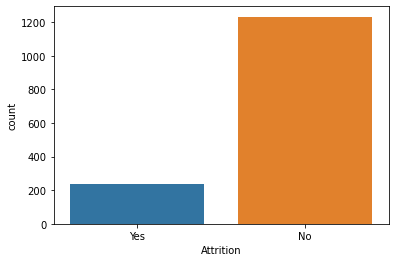

In [3]:
sns.countplot(x='Attrition', data=df)

In [2]:
dec_cols = ['Age', 'Attrition', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsInCurrentRole']
#dec_cols = ['Age']
df = df[dec_cols]
df.head()

,Age,Attrition,JobLevel,JobRole,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole
0,41,Yes,2,Sales Executive,Single,5993,Yes,11,3,8,1,4
1,49,No,2,Research Scientist,Married,5130,No,23,4,10,3,7
2,37,Yes,1,Laboratory Technician,Single,2090,Yes,15,3,7,3,0
3,33,No,1,Research Scientist,Married,2909,Yes,11,3,8,3,7
4,27,No,1,Laboratory Technician,Married,3468,No,12,3,6,3,2


In [3]:
#df.drop(['BusinessTravel', 'DailyRate','Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'RelationshipSatisfaction', 'EmployeeCount', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Attrition'] = df.Attrition.astype("category").cat.codes

df

,Age,Attrition,JobLevel,JobRole,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole
0,41,1,2,Sales Executive,Single,5993,Yes,11,3,8,1,4
1,49,0,2,Research Scientist,Married,5130,No,23,4,10,3,7
2,37,1,1,Laboratory Technician,Single,2090,Yes,15,3,7,3,0
3,33,0,1,Research Scientist,Married,2909,Yes,11,3,8,3,7
4,27,0,1,Laboratory Technician,Married,3468,No,12,3,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,Laboratory Technician,Married,2571,No,17,3,17,3,2
1466,39,0,3,Healthcare Representative,Married,9991,No,15,3,9,3,7
1467,27,0,2,Manufacturing Director,Married,6142,Yes,20,4,6,3,2
1468,49,0,2,Sales Executive,Married,5390,No,14,3,17,2,6


In [4]:
categorical_col.remove('Attrition')

In [5]:
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [6]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [7]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train==True:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    925.0  177.0       1.0     1102.0        1102.0
_______________________________________________
Confusion Matrix: 
 [[925   0]
 [  0 177]]

Test Result:
Accuracy Score: 79.35%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.862500   0.333333  0.793478    0.597917      0.776223
recall       0.896104   0.266667  0.793478    0.581385      0.793478
f1-score     0.878981   0.296296  0.793478    0.587639      0.783978
support    308.000000  60.000000  0.793478  368.000000    368.000000
_______________________________________________
Conf

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 88.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.899396    0.712963  0.881125     0.806180      0.869452
recall       0.966486    0.435028  0.881125     0.700757      0.881125
f1-score     0.931735    0.540351  0.881125     0.736043      0.868872
support    925.000000  177.000000  0.881125  1102.000000   1102.000000
_______________________________________________
Confusion Matrix: 
 [[894  31]
 [100  77]]

Test Result:
Accuracy Score: 85.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.878698   0.633333  0.858696    0.756016      0.838693
recall 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred=rf_clf.predict(X_test)

y_test = y_test.tolist()
y_pred_list = y_pred.tolist()

print(np.round(roc_auc_score(y_test, y_pred_list),4))
#print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

0.5835


In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_res, y_res)

y_pred=rf_clf.predict(X_res)
y_res = y_res.tolist()
y_pred_list = y_pred.tolist()

print(np.round(roc_auc_score(y_res, y_pred_list),6))

#print_score(rf_clf, X_res, y_res, X_test, y_test, train=True)
#print_score(rf_clf, X_res, y_res, X_test, y_test, train=False)

1.0


0.5819
